In [1]:
from gensim.models import word2vec
import matplotlib.pyplot as plt

In [13]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8,6))
    plt.scatter(xs, ys, marker='o')
    for index, word in enumerate(vocabs):
        plt.annotate(word, (xs[index], ys[index]))

In [3]:
sentences = [
    ['this', 'is', 'a', 'good', 'product'],
    ['it', 'is', 'a', 'excellent', 'product'],
    ['it', 'is', 'a', 'bad', 'product'],
    ['that', 'is', 'the', 'worst', 'product']
]

In [7]:
model = word2vec.Word2Vec(sentences, size=300, 
                          window=3, min_count=1, workers=1)

In [8]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [9]:
print(word_vectors.similarity(w1='it', w2='this'))

0.013540454


In [10]:
print(word_vectors.similarity(w1='good', w2='bad'))

0.009502374


In [15]:
print(word_vectors.similarity(w1='it', w2='is'))

0.029884035


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

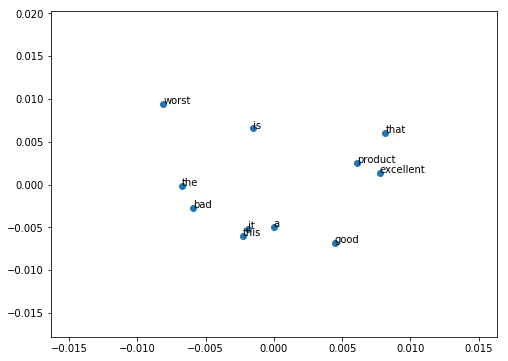

In [14]:
plot_2d_graph(vocabs, xs, ys)

In [16]:
from gensim.models import KeyedVectors
#file_name = 'GoogleNews-vectors-negative300.bin'
#model.intersect_word2vec_format(fname=file_name, binary=True)
model = KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin', 
                                          binary=True)  

In [17]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [18]:
print(word_vectors.similarity(w1='it', w2='this'))

0.5386158


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [ ]:
plot_2d_graph(vocabs, xs, ys)

In [ ]:
model.save('word2vec.model')

model = Word2Vec.load('word2vec.model')